### **Random Forest: The Power of the Ensemble**

* Random Forest is a supervised machine learning algorithm that is part of a family of methods called **ensemble learning**. 

* Instead of relying on a single, powerful model, an ensemble method combines the predictions from multiple simpler models to achieve a more accurate and robust result.

* Think of it like this: If you want to predict the outcome of a complex situation, you would get a more reliable answer by asking a diverse group of experts and then combining their opinions, rather than relying on just one expert. Random Forest applies this same logic to machine learning.

#### Key Concepts

* **Ensemble of Decision Trees**: A Random Forest model is, as its name suggests, a collection (or "forest") of individual Decision Trees. Each tree is trained independently on a different subset of the data.

* **Randomness in the Training Process**: The "random" in Random Forest comes from two key mechanisms that ensure the trees are diverse:
    1.  **Random Subsets of Data**: Each tree is trained on a different, random sample of the training data. This process is called **bagging** (Bootstrap Aggregation).

    2.  **Random Subsets of Features**: At each node of a Decision Tree, only a random subset of the total features is considered for the split. This prevents the model from relying too heavily on a single dominant feature and helps to decorrelate the trees.

* **"Voting" for the Final Prediction**: When the Random Forest needs to make a prediction for a new data point, it passes the data point through all of its individual Decision Trees. For a classification problem, each tree "votes" for a class. The final prediction is the class that receives the majority of the votes.

---

#### Why Random Forest is so Powerful?

* **Improved Accuracy**: By averaging the results of many trees, a Random Forest often achieves a higher accuracy than any single Decision Tree.

* **Reduced Overfitting**: A single Decision Tree can be prone to overfitting, where it learns the training data too well and performs poorly on new data. The randomness in a Random Forest's training process helps prevent this.

* **Feature Importance**: Random Forest can provide a measure of feature importance, helping you understand which features contributed most to the model's predictions.

Visual illustration of the Random Forest concept:

![Random_Forest_Classification](Random_Forest_Classification.png)

---


### **Key Parameters of `RandomForestClassifier()`**

Understanding these parameters is crucial for fine-tuning your model. Think of them as dials you can turn to control the model's complexity and performance.

* `n_estimators`: This is the **number of trees in the forest**. 
  * A larger number of trees generally leads to a more accurate and stable model, as it reduces the variance in predictions. However, it also increases the computational cost.

* `max_depth`: This parameter controls the **maximum depth of each individual tree**. 
  * Limiting the depth prevents the trees from becoming too complex and overfitting the training data.

* `random_state`: This is important for **reproducibility**. 
  * By setting a specific value, you ensure that the random selection of data samples and features is the same every time you run the code, leading to consistent results.

* `max_features`: This parameter controls the **number of features** that the algorithm considers when looking for the best split at each node. 
  * This is a key mechanism for creating diversity among the trees and reducing overfitting.

---

### **Practical Example: Heart Disease Prediction**

* In this notebook, we will use a Random Forest model to predict the presence of heart disease in patients. 

* This is a crucial task in healthcare, where an accurate, robust model can assist medical professionals in diagnosis. We will use a `heart_disease.csv` dataset with features like:

  * **`age`**: The patient's age.
  * **`cholesterol`**: The patient's cholesterol level.
  * **`chest_pain_type`**: A categorical feature describing the type of chest pain.
  * **`max_heart_rate`**: The patient's maximum heart rate achieved during exercise.

* The target variable we want to predict is **`heart_disease`** (`1` for presence, `0` for absence).

#### Step 1: Import Libraries,Load and Explore Dataset

* First, we'll import the essential libraries. 
* We'll then load and explore dataset for our analysis.

In [ ]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
# Load the data
df = pd.read_csv('heart_disease.csv')

print("--- First 5 rows of the dataset ---")
df.head()

--- First 5 rows of the dataset ---


,age,cholesterol,chest_pain_type,max_heart_rate,heart_disease
0,67,286,atypical angina,122,1
1,57,293,typical angina,149,1
2,43,253,typical angina,100,1
3,71,164,typical angina,176,0
4,36,207,non-anginal pain,121,0


In [45]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              250 non-null    int64 
 1   cholesterol      250 non-null    int64 
 2   chest_pain_type  250 non-null    object
 3   max_heart_rate   250 non-null    int64 
 4   heart_disease    250 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.9+ KB


#### Step 2: Data Preprocessing

* Random Forest models in `scikit-learn` work with numerical data. 

* Our dataset contains a categorical feature, `chest_pain_type`, which needs to be converted into a numerical format. 

* We will use `LabelEncoder` to transform the pain types into numerical representations.

In [46]:
# Create a LabelEncoder instance for the 'chest_pain_type' column
le_pain = LabelEncoder()

# Apply the LabelEncoder to the 'chest_pain_type' column to create a new numerical column
df['chest_pain_type_n'] = le_pain.fit_transform(df['chest_pain_type'])

# Display the DataFrame with the new numerical column
print("--- DataFrame after Label Encoding ---")
df.head()

--- DataFrame after Label Encoding ---


,age,cholesterol,chest_pain_type,max_heart_rate,heart_disease,chest_pain_type_n
0,67,286,atypical angina,122,1,0
1,57,293,typical angina,149,1,2
2,43,253,typical angina,100,1,2
3,71,164,typical angina,176,0,2
4,36,207,non-anginal pain,121,0,1


#### Step 3: Define Features and Target

* Now we'll separate our dataset into the features (`X`) that the model will use for prediction and the target variable (`y`) that we want to predict.

In [47]:
# Define features (X) using the numerical columns
X = df[['age', 'cholesterol', 'chest_pain_type_n', 'max_heart_rate']]
y = df['heart_disease']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (250, 4)
Target (y) shape: (250,)


#### Step 4: Split Data into Training and Testing Sets

* To ensure our model can generalize well to new data, we split the dataset into a training set (80%) and a testing set (20%).

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 200
Testing data size: 50


#### Step 5: Create and Train the Random Forest Model

* We instantiate the `RandomForestClassifier` and train it on our training data using the `fit()` method. 

* We'll start with a default of 100 trees, which is often a good starting point.

In [49]:
# Create an instance of the Random Forest Classifier with 100 trees
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


#### Step 6: Evaluate Model Performance

* After training, we use the `score()` method to calculate the model's accuracy on the testing data. 

* A high accuracy score indicates that our ensemble of trees has successfully learned the patterns.

In [50]:
# Evaluate the model accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Data: {accuracy:.2f}")

Model Accuracy on Test Data: 0.92


In [51]:
# We can also get predictions to see a more detailed report
y_pred = model.predict(X_test)
print("\n--- Classification Report ---\n")
print(classification_report(y_test, y_pred))


--- Classification Report ---

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.95      0.86      0.90        22

    accuracy                           0.92        50
   macro avg       0.93      0.91      0.92        50
weighted avg       0.92      0.92      0.92        50



#### Step 7: Analyze Feature Importance

* One of the benefits of Random Forest is the ability to determine which features were most important for making predictions. 

* We can extract this information from the trained model to gain insights into the data.

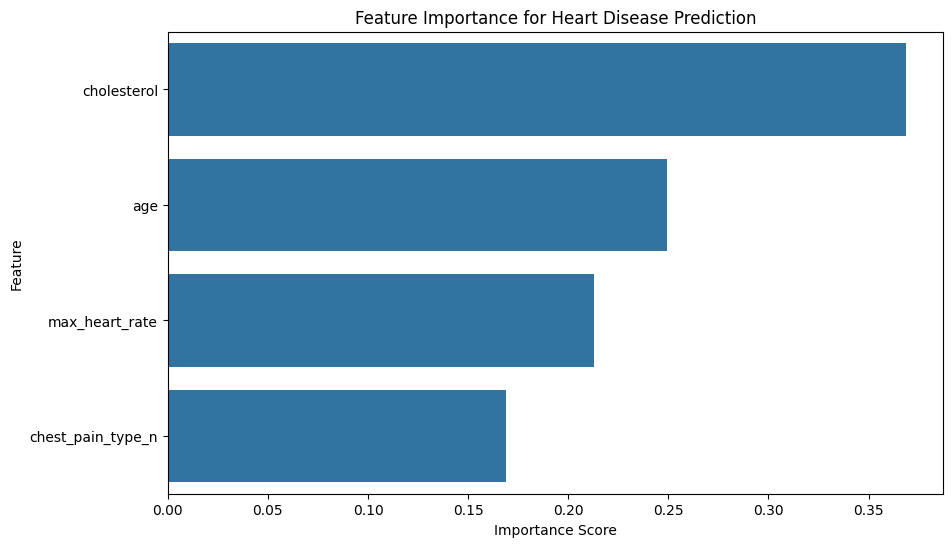

In [52]:
# Feature Importance from Random Forest Classifier model
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance for Heart Disease Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

#### Step 8: Make Predictions for a New Patient

* Finally, we can use our trained model to predict the heart disease status of a new, hypothetical patient.

In [58]:
# Create a hypothetical new patient's data
# Features: age=55, cholesterol=220, chest_pain_type='non-anginal pain' (n=2), max_heart_rate=145
new_patient = pd.DataFrame({
    'age': [55],
    'cholesterol': [220],
    'chest_pain_type_n': [2],
    'max_heart_rate': [145]
})

# Make a prediction
prediction = model.predict(new_patient)

if prediction[0] == 1:
    print("This patient is predicted to have HEART DISEASE.")
else:
    print("This patient is predicted to NOT have HEART DISEASE.")

This patient is predicted to have HEART DISEASE.


#### Summary

* In this notebook, we successfully built and trained a Random Forest classifier to predict heart disease. We learned how to:

  * **Understand the Concept**: We covered the core principles of Random Forest, including ensemble learning and the power of combining multiple Decision Trees.
  
  * **Handle Categorical Data**: We used `LabelEncoder` to transform the 'chest_pain_type' feature into a numerical format.

  * **Evaluate Performance**: We calculated an accuracy score and a classification report to measure the model's effectiveness on unseen data.

  * **Analyze Feature Importance**: We visualized which features were most influential in the model's predictions, providing valuable medical insights.

  * **Make Predictions**: We used the trained model to make a prediction for a new patient, demonstrating its practical application. 

* This exercise highlights the robustness and insight-generating capabilities of the Random Forest algorithm.

---

#### **Exercise - Random Forest Classifier for Customer Satisfaction**

##### Problem Statement

* Develop a model that can predict customer satisfaction based on their purchasing behavior and product experience. 

* The goal is to predict whether a customer is **'Satisfied'** (1) or **'Dissatisfied'** (0) with a product. 

* Use a **Random Forest** classifier model for this task.

##### Necessary Steps to be performed

  1.  **Import Libraries, Load and Explore Dataset**: Import the necessary libraries, load and explore the `customer_satisfaction.csv` dataset for analysis.

  2.  **Data Preprocessing**: Prepare the data for the model by converting categorical features into a numerical format.

  3.  **Define Features and Target**: Separate the dataset into feature variables (`X`) and the target variable (`y`).

  4.  **Split Data**: Divide the data into a training set and a testing set.

  5.  **Create and Train Model**: Instantiate a `RandomForestClassifier` and train it on the training data.
  
  6.  **Evaluate Model Performance**: Test the model's accuracy on the unseen data.

  7.  **Analyze Feature Importance**: Analyze which features were most influential in the model's predictions.

  8.  **Make Predictions**: Use the model to predict the satisfaction level for a new customer.

---


* Donwload Dataset:  [customer_satisfaction.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/09_Random_Forest_Classification_ML/01_Exercise_Random_Forest_Classification_ML/customer_satisfaction.csv)
* Solution : [Exercise - Random Forest Classifier for Customer Satisfaction](https://github.com/prakash-ukhalkar/ML/blob/main/09_Random_Forest_Classification_ML/01_Exercise_Random_Forest_Classification_ML/01_Exercise_Random_Forest_Classification_ML.ipynb)

---